In [5]:
import json

with open('fires_group_by_date_idn.json') as thefile:
    data = json.load(thefile)
    
data = data['data']

In [6]:
import pandas as pd
df = pd.DataFrame(data)

print df.head()

   SUM(alerts)     alert_date
0         1434  1505779200000
1          861  1505174400000
2          895  1500854400000
3         1585  1503792000000
4         2561  1471478400000


In [14]:
df = df.rename(index=str, columns={"SUM(alerts)": "alerts"})
df.head()

,alerts,alert_date,fire_date_format,month
0,1434,1505779200000,2017-09-19,9
1,861,1505174400000,2017-09-12,9
2,895,1500854400000,2017-07-24,7
3,1585,1503792000000,2017-08-27,8
4,2561,1471478400000,2016-08-18,8


In [15]:
df['fire_date_format'] = pd.to_datetime(df.alert_date, unit='ms')
df.head()

,alerts,alert_date,fire_date_format,month
0,1434,1505779200000,2017-09-19,9
1,861,1505174400000,2017-09-12,9
2,895,1500854400000,2017-07-24,7
3,1585,1503792000000,2017-08-27,8
4,2561,1471478400000,2016-08-18,8


In [16]:
import datetime
df['month'] = df.fire_date_format.dt.month
print df.head()

   alerts     alert_date fire_date_format  month
0    1434  1505779200000       2017-09-19      9
1     861  1505174400000       2017-09-12      9
2     895  1500854400000       2017-07-24      7
3    1585  1503792000000       2017-08-27      8
4    2561  1471478400000       2016-08-18      8


In [18]:
grouped = df.groupby('month')['alerts'].sum().reset_index()

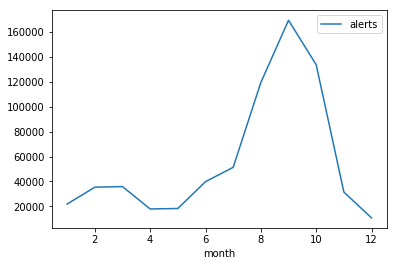

In [20]:
grouped.plot(x='month', y='alerts')

In [21]:
df.head()

,alerts,alert_date,fire_date_format,month
0,1434,1505779200000,2017-09-19,9
1,861,1505174400000,2017-09-12,9
2,895,1500854400000,2017-07-24,7
3,1585,1503792000000,2017-08-27,8
4,2561,1471478400000,2016-08-18,8


In [27]:
with open('adm2_response.json') as thedata:
    data = json.load(thedata)
    
data = data['data']

df = pd.DataFrame(data)

df = df.rename(index=str, columns={'SUM(alerts)':'alerts'})
adm2 = df.groupby(df.adm2)['alerts'].sum().reset_index()
adm2.head()

,adm2,alerts
0,1,431
1,2,3282
2,3,881
3,4,945
4,5,1412


In [28]:
adm2.tail()

,adm2,alerts
431,439,625
432,440,21
433,441,17
434,442,33
435,443,16


In [29]:
date

,alerts,adm1,adm2
0,10165,23,290
1,4861,23,277
2,2150,23,283
3,3974,23,289
4,6142,23,281


In [50]:
with open('fires_group_by_date_idn.json') as thefile:
    data = json.load(thefile)
    
data = data['data']
date_df = pd.DataFrame(data)
date_df = date_df.rename(index=str, columns={"SUM(alerts)": "alerts"})
date_df.head()
date_df['fire_date_format'] = pd.to_datetime(date_df.alert_date, unit='ms')
date_df.head()

,alerts,alert_date,fire_date_format
0,1434,1505779200000,2017-09-19
1,861,1505174400000,2017-09-12
2,895,1500854400000,2017-07-24
3,1585,1503792000000,2017-08-27
4,2561,1471478400000,2016-08-18


In [65]:
date_df['week'] = date_df.fire_date_format.dt.week
date_df['year'] = date_df.fire_date_format.dt.year
date_df['quarter'] = date_df.fire_date_format.dt.quarter
date_df['month'] = date_df.fire_date_format.dt.month

In [66]:
week = date_df.groupby(['week', 'year'])['alerts'].sum().reset_index()
week.shape

(337, 3)

In [67]:
week = week.sort_values(['year', 'week'])
week.tail()

,week,year,alerts
132,19,2018,1377
139,20,2018,689
146,21,2018,673
153,22,2018,986
160,23,2018,485


In [76]:
quarter = date_df.groupby(['year', 'quarter'])['alerts'].sum().reset_index()
print quarter.shape
print quarter.head()
print quarter.tail()

(26, 3)
   year  quarter  alerts
0  2012        1    3683
1  2012        2   10963
2  2012        3   44774
3  2012        4   12512
4  2013        1    3614
    year  quarter  alerts
21  2017        2   10874
22  2017        3   59724
23  2017        4   28686
24  2018        1   14045
25  2018        2    8826


In [78]:
month = date_df.groupby(['year', 'month'])['alerts'].sum().reset_index()
print month.shape
print month.head()
print month.tail()

(78, 3)
   year  month  alerts
0  2012      1    1474
1  2012      2     906
2  2012      3    1303
3  2012      4    1053
4  2012      5    1975
    year  month  alerts
73  2018      2    8126
74  2018      3    3549
75  2018      4    3534
76  2018      5    4285
77  2018      6    1007


In [79]:
day = date_df.groupby(['year', 'fire_date_format'])['alerts'].sum().reset_index()
print day.shape
print day.head()
print day.tail()

(2344, 3)
   year fire_date_format  alerts
0  2012       2012-01-01     129
1  2012       2012-01-02      25
2  2012       2012-01-03      45
3  2012       2012-01-04     135
4  2012       2012-01-05      22
      year fire_date_format  alerts
2339  2018       2018-06-01     112
2340  2018       2018-06-02     197
2341  2018       2018-06-03     213
2342  2018       2018-06-04     242
2343  2018       2018-06-05     243
